In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
_URL = "https://storage.googleapis.com/mledu-dataset/cats_and_dogs_filtered.zip"

In [3]:
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip',origin=_URL,extract=True)

In [4]:
zip_dir

'C:\\Users\\SHREYA\\.keras\\datasets\\cats_and_dogs_filtered.zip'

In [5]:
zip_dir_base = os.path.dirname(zip_dir)

In [6]:
zip_dir_base

'C:\\Users\\SHREYA\\.keras\\datasets'

In [7]:
zip_dir_base
!find $zip_dir_base -type d -print

FIND: Parameter format not correct


In [8]:
zip_dir_base
!find $zip_dir_base -type d -print

FIND: Parameter format not correct


In [9]:
base_dir = os.path.join(os.path.dirname(zip_dir),'cats_and_dogs_filtered')

In [10]:
base_dir

'C:\\Users\\SHREYA\\.keras\\datasets\\cats_and_dogs_filtered'

In [11]:
train_dir = os.path.join(base_dir,'train')

In [12]:
train_dir

'C:\\Users\\SHREYA\\.keras\\datasets\\cats_and_dogs_filtered\\train'

In [13]:
validation_dir = os.path.join(base_dir,'validation')

In [14]:
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [15]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))
num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))
print('total training cats images: ', num_cats_tr)
print('total training dogs images: ', num_dogs_tr)
print('total validation cats images: ', num_cats_val)
print('total validation dogs images: ', num_dogs_val)

total training cats images:  1000
total training dogs images:  1000
total validation cats images:  500
total validation dogs images:  500


In [16]:
total_train=num_cats_tr+num_dogs_tr
total_val=num_cats_val+num_dogs_val
print('Total Training images',total_train)
print('Total validation images',total_val)

Total Training images 2000
Total validation images 1000


In [17]:
BATCH_SIZE = 100
IMG_SHAPE = 150

In [18]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [19]:
train_data_gen = train_image_generator.flow_from_directory(
batch_size=BATCH_SIZE,
directory=train_dir,
shuffle=True,
target_size=(IMG_SHAPE,IMG_SHAPE),
class_mode='binary')

Found 2000 images belonging to 2 classes.


In [20]:
validation_data_gen = validation_image_generator.flow_from_directory(directory=validation_dir,
                                                                    shuffle=True,
                                                                    target_size=(IMG_SHAPE,IMG_SHAPE),
                                                                    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [21]:
train_data_gen.class_indices

{'cats': 0, 'dogs': 1}

In [22]:
sample_training_images, label = next(train_data_gen)

In [23]:
sample_training_images.shape

(100, 150, 150, 3)

In [24]:
def plotImages(image_arr):
    fig,axes = plt.subplots(1,5,figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(image_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

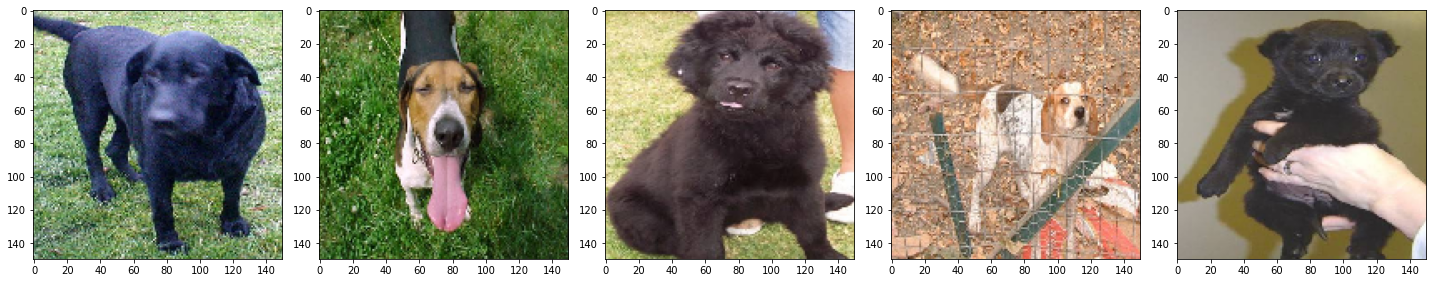

In [25]:
plotImages(sample_training_images[0:5])

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [57]:
model = Sequential([
    Conv2D(16,3,padding='same',activation='relu',input_shape=(150,150,3)), 
    MaxPooling2D(), 
    Conv2D(32,3,padding='same',activation='relu'), 
    MaxPooling2D(),
    Conv2D(64,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(2,activation='softmax')
])

In [58]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 20736)            

In [67]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [68]:
epochs =10
history = model.fit(train_data_gen,steps_per_epoch=total_train//BATCH_SIZE,epochs=epochs,
                             validation_data=validation_data_gen,validation_steps=total_val//BATCH_SIZE)

Epoch 1/10
20/20 [==============================] - 43s 2s/step - loss: 0.8927 - accuracy: 0.4965 - val_loss: 0.6867 - val_accuracy: 0.6594
Epoch 2/10
20/20 [==============================] - 43s 2s/step - loss: 0.6869 - accuracy: 0.5335 - val_loss: 0.6857 - val_accuracy: 0.5000
Epoch 3/10
20/20 [==============================] - 46s 2s/step - loss: 0.6677 - accuracy: 0.6170 - val_loss: 0.6242 - val_accuracy: 0.6781
Epoch 4/10
20/20 [==============================] - 45s 2s/step - loss: 0.6012 - accuracy: 0.6735 - val_loss: 0.5761 - val_accuracy: 0.6812
Epoch 5/10
20/20 [==============================] - 45s 2s/step - loss: 0.5450 - accuracy: 0.7265 - val_loss: 0.6038 - val_accuracy: 0.6812
Epoch 6/10
20/20 [==============================] - 44s 2s/step - loss: 0.4773 - accuracy: 0.7710 - val_loss: 0.6188 - val_accuracy: 0.6969
Epoch 7/10
20/20 [==============================] - 44s 2s/step - loss: 0.4342 - accuracy: 0.7995 - val_loss: 0.6073 - val_accuracy: 0.6844
Epoch 8/10
20/20 [==

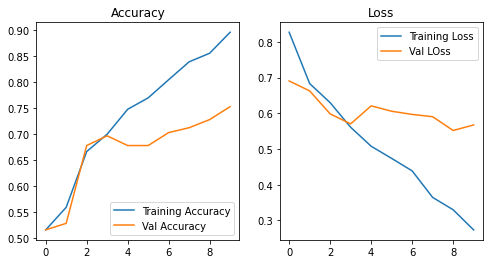

In [59]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Val LOss')
plt.legend(loc=0)
plt.title('Loss')
plt.show()

In [60]:
from keras.preprocessing import image
from keras.preprocessing.image import load_img,img_to_array,array_to_img

In [61]:
test_img = load_img('CAT.jpg', target_size=(150,150))

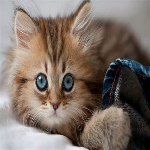

In [62]:
test_img

In [63]:
test_array = img_to_array(test_img)

In [64]:
test_array

array([[[186., 187., 192.],
        [185., 186., 191.],
        [183., 184., 189.],
        ...,
        [148., 142., 142.],
        [146., 140., 140.],
        [145., 139., 139.]],

       [[184., 185., 190.],
        [183., 184., 189.],
        [181., 182., 187.],
        ...,
        [143., 137., 137.],
        [142., 136., 136.],
        [142., 136., 136.]],

       [[185., 186., 191.],
        [184., 185., 190.],
        [182., 183., 188.],
        ...,
        [141., 135., 135.],
        [140., 134., 134.],
        [142., 136., 136.]],

       ...,

       [[209., 214., 220.],
        [204., 209., 215.],
        [200., 205., 211.],
        ...,
        [  1.,   1.,   1.],
        [  1.,   1.,   1.],
        [  1.,   1.,   1.]],

       [[210., 215., 221.],
        [203., 208., 214.],
        [202., 207., 213.],
        ...,
        [  1.,   1.,   1.],
        [  1.,   1.,   1.],
        [  0.,   0.,   0.]],

       [[213., 218., 224.],
        [208., 213., 219.],
        [207., 2

In [65]:
test_array.shape

(150, 150, 3)

In [70]:
test_array = img_to_array(test_img)
test_array = test_array.reshape(1,150,150,3)
test_array.shape

(1, 150, 150, 3)

In [71]:
model.predict(test_array).round()

array([[0., 1.]], dtype=float32)

In [72]:
# Augumentaion 

In [76]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

In [80]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                    directory=train_dir,
                                                    shuffle=True,
                                                    target_size=(IMG_SHAPE,IMG_SHAPE),
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [81]:
image_gen_val = ImageDataGenerator(rescale=1./225)
val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                directory=validation_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='binary')

Found 1000 images belonging to 2 classes.


In [89]:
augumented_image,label = next(train_data_gen)

In [90]:
augumented_image.shape

(100, 150, 150, 3)

In [91]:
label.shape

(100,)

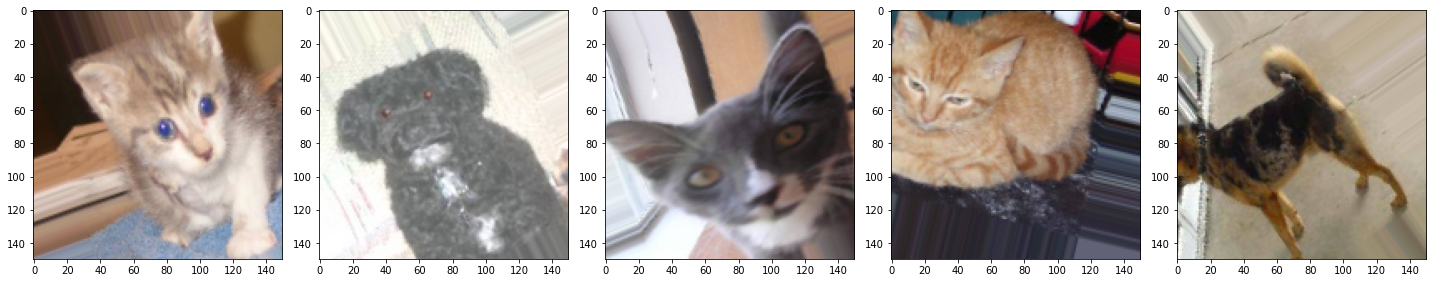

In [93]:
plotImages(augumented_image[5:10])

In [95]:
model_new = Sequential([
    Conv2D(16,3,padding='same',activation='relu',input_shape=(150,150,3)), #150
    MaxPooling2D(), #75
    Dropout(0.2),
    Conv2D(32,3,padding='same',activation='relu'), #75
    MaxPooling2D(),#37
    Dropout(0.2),
    Conv2D(64,3,padding='same',activation='relu'),#37
    MaxPooling2D(),#18
    Dropout(0.2),
    Flatten(),
    Dense(512,activation='relu'),
    Dropout(0.2),
    Dense(1,activation='sigmoid')
])

In [99]:
model_new.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 37, 37, 64)       

In [97]:
epochs = 50

In [100]:
model_new.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [102]:
history = model_new.fit(train_data_gen,steps_per_epoch=total_train//BATCH_SIZE,
                                 epochs=epochs,
                                 validation_data=val_data_gen,
                                 validation_steps=total_val//BATCH_SIZE)

Epoch 1/50
20/20 [==============================] - 64s 3s/step - loss: 1.2166 - accuracy: 0.4940 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 2/50
20/20 [==============================] - 60s 3s/step - loss: 0.6925 - accuracy: 0.5145 - val_loss: 0.6924 - val_accuracy: 0.5280
Epoch 3/50
20/20 [==============================] - 63s 3s/step - loss: 0.6921 - accuracy: 0.5220 - val_loss: 0.6902 - val_accuracy: 0.5590
Epoch 4/50
20/20 [==============================] - 60s 3s/step - loss: 0.6906 - accuracy: 0.5380 - val_loss: 0.6882 - val_accuracy: 0.5660
Epoch 5/50
20/20 [==============================] - 69s 3s/step - loss: 0.6872 - accuracy: 0.5560 - val_loss: 0.6959 - val_accuracy: 0.4920
Epoch 6/50
20/20 [==============================] - 75s 4s/step - loss: 0.6882 - accuracy: 0.5345 - val_loss: 0.6795 - val_accuracy: 0.5750
Epoch 7/50
20/20 [==============================] - 68s 3s/step - loss: 0.6779 - accuracy: 0.5555 - val_loss: 0.6561 - val_accuracy: 0.5860
Epoch 8/50
20/20 [==

In [105]:
model_new.evaluate

<bound method Model.evaluate of <keras.engine.sequential.Sequential object at 0x000001CC3217D550>>

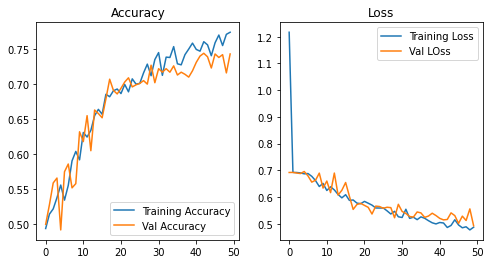

In [106]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Val LOss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

In [107]:
model_new.predict(test_array).round()

array([[1.]], dtype=float32)

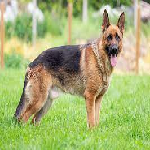

In [109]:
img_test = load_img("Dog.jpg",target_size=(150,150))
img_test

In [112]:
test_array = img_to_array(img_test)
test_array = test_array.reshape(1,150,150,3)
test_array.shape

(1, 150, 150, 3)

In [113]:
model_new.predict(test_array).round()

array([[1.]], dtype=float32)